# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

## Jacqueline Beechert, jbeechert@berkeley.edu

### I worked with Gregory Ottino on this assignment.

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

### Answer: 
I chose Figure 6 from Troja, E., Ryan, G., Piro, L. et al (2018), linked [here](https://www.nature.com/articles/s41467-018-06558-7#citeas). 

<img src="Fig6_Troja2018.png"/>

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

### Answer:
<p>This paper presents a study of GRB150101B in an attempt to elucidate the widely varying characteristics of GRB events. In particular, the authors identify GRB150101B as a potential analogue to GRB170817A, which was a counterpart to the famous neutron star merger event identified by GW170817. Through detailed comparison of GRB150101B's and GRB170817A's properties and their relationship to observations of other short GRBs, the authors conclude that the luminous blue kilonovas and off-axis locations of both may be common to GRBs from neutron star mergers. Thus, even though no GW was detected with GRB150101B, it may be of similar origin to GRB170817A.</p>

<p>Figure 6 compares the early optical emission from a sample of short GRBs. This comparison is important to disentangling the timescales and characteristics of GRB follow-up observations. The figure conveys very clearly that such GRB studies are plagued by insufficient statisics; indeed this is a crucial point to convey as our limited number of events severely constrains our ability to derive robust, observation-based models of GRB emission. It is also clear that the figure is comparing other GRB events to AT2017gfo, the kilonova associated with GRB170817A.</p>
    
<p>During my first read, I found the hatched area spanning $\pm$ 1 mag to be a bit visually jarring. I didn't initially notice the dashed line tracing the primary AT2017gfo curve underneath the hatches. I would have chosen to show the $\pm$ 1 mag spread with a solid, more transparent pink shading (e.j. plt.fill_between, alpha=0.5). This would have reduced the sheer number of lines in the figure.</p>

<p>Furthermore, using both different shades of gray/black and different shapes to indicate the separate GRB events is confusing to me. I think it would have been simpler to include all of the GRB events as different shapes, but all in black. Otherwise, it seems that color and shape represent different variables.</p>

<p>These thoughts aside, the message of the figure remains clear. There is substantial variation in optical observations of short GRBs and the number of available observations is very limited. Some GRBs vaguely follow the emission from AT2017gfo, while others, like GRB050509B and GRB 080905A, fall outside of the illustrated $\pm$ 1 mag spread.</p>

<p>One very minor note: Unfortunately, there is a typo in the legend. AT2017gfo is written as AT20017gfo. But, we're all human. We can't always catch every typo, and in no way does the typo hinder the interpretation of the plot.</p>

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

### Original plot: 

<p>Here's a plot I made with matplotlib to examine data from my research group's 2016 balloon flight. We were searching for the signature of Galactic $^{26}$Al, which emits a 1809 keV $\gamma$-ray upon decay. The signal region is the Inner Galaxy, where $^{26}$Al is concentrated, and the background region is everywhere exclusive of the Inner Galaxy.</p>

<img src="full_flight_spectrum_ay250_hw2.jpg"/>

### Re-make in bokeh:

In [2]:
from bokeh.io import show, output_notebook, output_file
from bokeh.layouts import row, column
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, Range1d, CustomJS
from bokeh.models.widgets import CheckboxGroup

In [3]:
df = pd.read_csv('full_flight_spectrum_ay250_hw2.txt',sep=' ',
                names=['energy', 'total', 'on_spec', 'off_spec', 
                      'total_err', 'on_spec_err', 'off_spec_err',
                      'diff', 'diff_err'])

In [4]:
output_notebook()

TOOLS = "hover, crosshair, pan, box_zoom, undo, redo, reset, save"


# show total, signal, and background region spectra
p1 = figure(tools=TOOLS, toolbar_location="right", plot_width=800, plot_height=300, y_axis_type="log")

p1.yaxis.axis_label = r"\[\mathrm{cnts } \mathrm{s}^{-1} \mathrm{keV}^{-1}\]"
p1.y_range = Range1d(10**-6, 2*10**-2)

total = p1.line(df['energy'], df['total'], line_width=2, line_color='blue', legend_label='Signal + Background')
signal = p1.line(df['energy'], df['on_spec'], line_width=2, line_color='green', legend_label='Signal Region')
bg = p1.line(df['energy'], df['off_spec'], line_width=2, line_color='black', legend_label='Background Region')


# add checkboxes to control which spectra are shown
checkboxes = CheckboxGroup(labels=["Signal + Background", "Signal", "Background"])
callback = CustomJS(code="""total.visible = false; 
                            signal.visible = false;
                            bg.visible = false;

                            if (cb_obj.active.includes(0)) {
                                total.visible = true;
                            } 
                            if (cb_obj.active.includes(1)) {
                                signal.visible = true;
                            }
                            if (cb_obj.active.includes(2)) { 
                                bg.visible = true;
                            }
                        """,
                    args={'total': total, 'signal': signal, 'bg': bg})
checkboxes.js_on_click(callback)


# put residual plot below
p2 = figure(tools=TOOLS, toolbar_location="right", plot_width=800, plot_height=300, y_axis_type="log")

p2.xaxis.axis_label = 'Energy [keV]'
p2.yaxis.axis_label = r"\[\mathrm{cnts } \mathrm{s}^{-1} \mathrm{keV}^{-1}\]"
p2.y_range = Range1d(10**-6, 2*10**-3)

residual = p2.line(df['energy'], df['diff'], line_width=2, line_color='black', legend_label='Signal - Background')

p2.add_layout(Arrow(end=OpenHead(line_color="red", line_width=5),
                   x_start=1809, y_start=10**-3, x_end=1809, y_end=10**-4))

# output to html
#output_file("interactive_flight_spectra.html")

# show them all together
show(column(row(p1, checkboxes), p2))

Loading BokehJS ...

b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

In [5]:
import ipywidgets as widgets
%matplotlib notebook

<IPython.core.display.Javascript object>


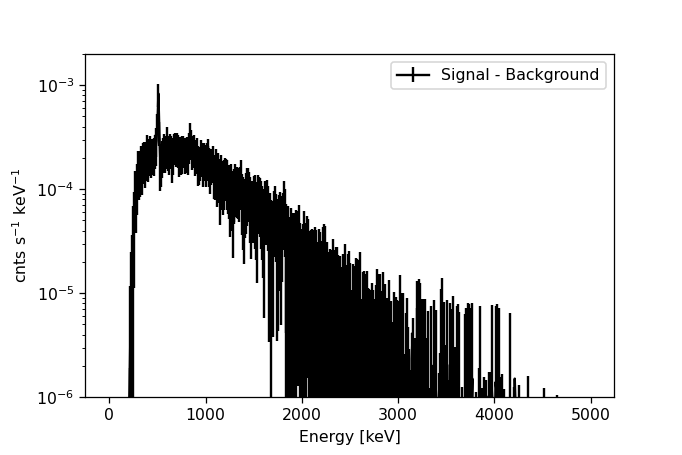

HTML(value='')

In [6]:
w = widgets.HTML()

fig, ax = plt.subplots()
ax.errorbar(df['energy'], df['diff'], yerr= df['diff_err'], color='black', label='Signal - Background')
ax.set_yscale('log')
ax.set_ylim(10**-6, 2*10**-3)
ax.set_xlabel('Energy [keV]')
ax.set_ylabel(r'cnts s$^{-1}$ keV$^{-1}$')
ax.legend()

def onclick(event):
    print(event)
    w.value = f'button={event.button}, x_canvas={event.x}, y_canvas={event.y}, x={event.xdata}, y={event.ydata}'

cid = fig.canvas.mpl_connect('button_press_event', onclick)

w

### Answer: 

<p>I couldn't quite get this to work as I intended (in the part (a) bokeh plot, all of the spectra appear initially, which is what I wanted, but then all of the checkboxes should also be clicked "on" initially, which they're not). I do like the zoom feature when looking at the spectra and it is nice being able to view only a subset of the three spectra in the top panel. Overall, I probably need more experience with bokeh to properly exploit all of its capabilities. The zoom feature is achievable with %matplotlib notebook, for example. I'm also not sure how to properly show error bars in bokeh, while in matplotlib I could simply call plt.errorbar(...).</p>

<p>I do like the "click" widget. This makes it very easy to visually identify a peak in the spectrum and find its energy and count rate. It also makes it easy to estimate the sizes of the error bars on each point. For those who are skimming a paper quickly, I believe that this clicking feature can help tell the story better. For example, the error bars in the 1809 keV bin are smaller than those in the adjacent bins. Quantifying the difference can be used as an informal, rough gauge of significance.</p>

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

In [7]:
from mpl_toolkits import mplot3d
from datetime import datetime

In [8]:
df = pd.read_csv("data/california_pressure_2022_01_15.csv")

In [9]:
df.head()

,valid(UTC),ACV,BFL,DAG,BIH,BLU,BLH,BUR,CMA,CRQ,...,SMX,SMO,STS,TVL,SCK,TRM,UKI,VCB,VNY,WVI
0,2022-01-15 09:00:00,29.970,29.653,28.226,26.172,24.978,29.744,29.327,30.020,29.730,...,29.842,29.894,30.050,24.090,30.195,30.287,29.536,30.115,29.241,30.002
1,2022-01-15 09:01:00,29.969,29.654,28.226,26.172,24.978,29.743,29.328,30.020,29.730,...,29.842,29.894,30.050,24.090,30.197,30.287,29.536,30.116,29.241,30.002
2,2022-01-15 09:02:00,29.969,29.654,28.227,26.172,24.978,29.743,29.328,30.021,29.731,...,29.842,29.894,30.050,24.091,30.197,30.287,29.535,30.117,29.240,30.002
3,2022-01-15 09:03:00,29.969,29.654,28.227,26.175,24.977,29.744,29.327,30.020,29.730,...,29.842,29.894,30.051,24.091,30.195,30.288,29.535,30.117,29.240,30.002
4,2022-01-15 09:04:00,29.969,29.655,28.228,26.174,24.977,29.745,29.327,30.019,29.731,...,29.841,29.894,30.049,24.090,30.195,30.288,29.534,30.118,29.240,30.002


In [10]:
SBA = df["SBA"] / df["SBA"][0]
OAK = df["OAK"] / df["OAK"][0]
MHS = df["MHS"] / df["MHS"][0]

print(f"SBA type: {SBA.dtype}, OAK type: {OAK.dtype}, MHS type: {MHS.dtype}")

SBA type: float64, OAK type: float64, MHS type: float64


<IPython.core.display.Javascript object>


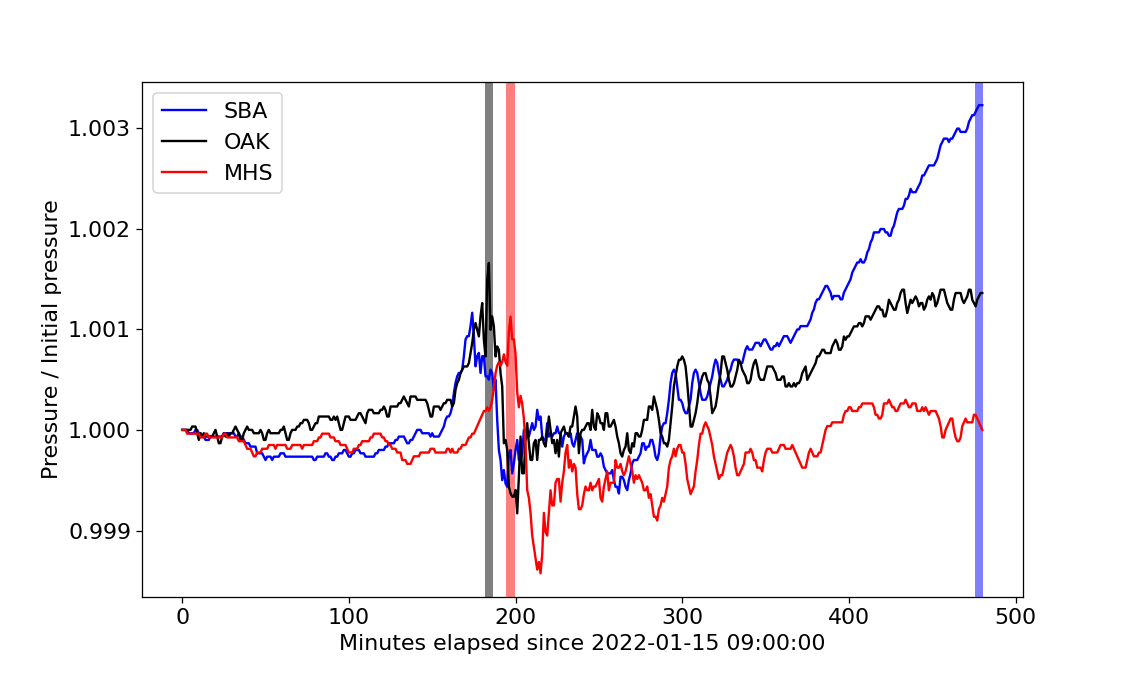

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
time = np.arange(df.index.stop)

color = ['b', 'k', 'r']
ax.plot(time, SBA, label="SBA", c=color[0])
ax.plot(time, OAK, label="OAK", c=color[1])
ax.plot(time, MHS, label="MHS", c=color[2])

# overplot vertical line at maximum of each series
SBA_max_time = time[np.argmax(SBA)]
ax.axvspan(SBA_max_time - 2.5, SBA_max_time + 2.5, color=color[0], alpha=0.5, lw=0)

OAK_max_time = time[np.argmax(OAK)]
ax.axvspan(OAK_max_time - 2.5, OAK_max_time + 2.5, color=color[1], alpha=0.5, lw=0)

MHS_max_time = time[np.argmax(MHS)]
ax.axvspan(MHS_max_time - 2.5, MHS_max_time + 2.5, color=color[2], alpha=0.5, lw=0)

# label, legend parameters
ax.set_xlabel("Minutes elapsed since {}".format(df["valid(UTC)"][0]), fontsize=14)
ax.set_ylabel("Pressure / Initial pressure", fontsize=14)
ax.tick_params(axis="both",labelsize=14)
plt.legend(loc="best",fontsize=14);

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

### Answer: 

<p>All three locations show a strong increase in pressure ~180 minutes after first recorded data point. Note that MHS's increase is a bit delayed past that point to ~200 minutes after, but it seems likely that all of these peaks are due to the Tongan shockwave because the rates of their respective increases and decreases are very similar. Also note that the slight displacement of the peaks from each other is not unexpected. Although all three locations are close to each other (relative to the distance traversed by the shockwave), the speed of sound is not *that* fast on the time scale of minutes and these locations are far enough away from each other to record the shockwave at noticeably different times.</p> 

<p>A major difference between the three locations is that although all experience a gradual increase in pressure after dropping after the shockwave, the pressure at SBA increases so dramatically that it exceeds the pressure of the initial shockwave.</p>

<p>OAK increases more than MHS, as well. It is interesting, then, that lower latitude locations saw greater pressure increases after the shockwave. Could there be an affect from volcanic ash itself, which might reach SBA first since it's closer to Tonga than the other two stations? Volcanic ash might increase air density.</p> 

<p>I also wonder how the differing weather conditions of the stations affects these pressure readings. The speed of sound changes with respect to temperature, density, etc., and it is possible that the shockwave will affect pressure readings differently at each location. OAK and SBA are probably at comparable elevations and MHS is at high elevation. However, all of the pressures here are normalized to the initial pressure, indicating a change from baseline conditions. So, I do not expect that elevation is a significant factor in SBA's dramatic increase.</p>

<p>Another consideration is whether the shockwave could have circumnavigated the globe and triggered pressure increases at these stations a second time. That said, naiively I would not predict such a dramatic discrepancy between the three stations at that later time, given that their initial increases in pressure were of comparable magnitude.</p>

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

In [12]:
df_2 = pd.read_csv('data/ca_asos.csv',usecols=['stid', 'lat', 'lon'])

In [13]:
df_2.head(5)

,stid,lat,lon
0,AAT,41.49139,-120.56444
1,ACV,40.97811,-124.10861
2,AUN,38.95481,-121.08172
3,AVX,33.40500,-118.41583
4,BFL,35.43440,-119.05420


In [14]:
# create dictionary of stations and lat, lon
stations = np.array(df_2['stid'])
lat = np.array(df_2['lat'])
lon = np.array(df_2['lon'])

d = {}

for i in range(len(stations)):
    station = stations[i]
    d[station] = (lat[i], lon[i])

In [15]:
# Computes percent change from immediately previous {interval} rows.
# Select the columns containing pressures from the first data frame
#  and set the period to {interval} rows for finding the percent change over the
#  previous {interval} minute interval --> first {interval - 1} rows are NaN.

# I set this interval via guess-and-check until I saw times 
#  (see time_of_change in below for loop) which approximately matched
#  the times of SBA, OAK, and MHS in the first plot. 
interval = 15 # minutes

pct_change_df = df.iloc[:,1:].pct_change(periods=interval)
#pct_change_df.head(20)

In [16]:
import cartopy

In [17]:
stations = df.columns[1:]

<IPython.core.display.Javascript object>


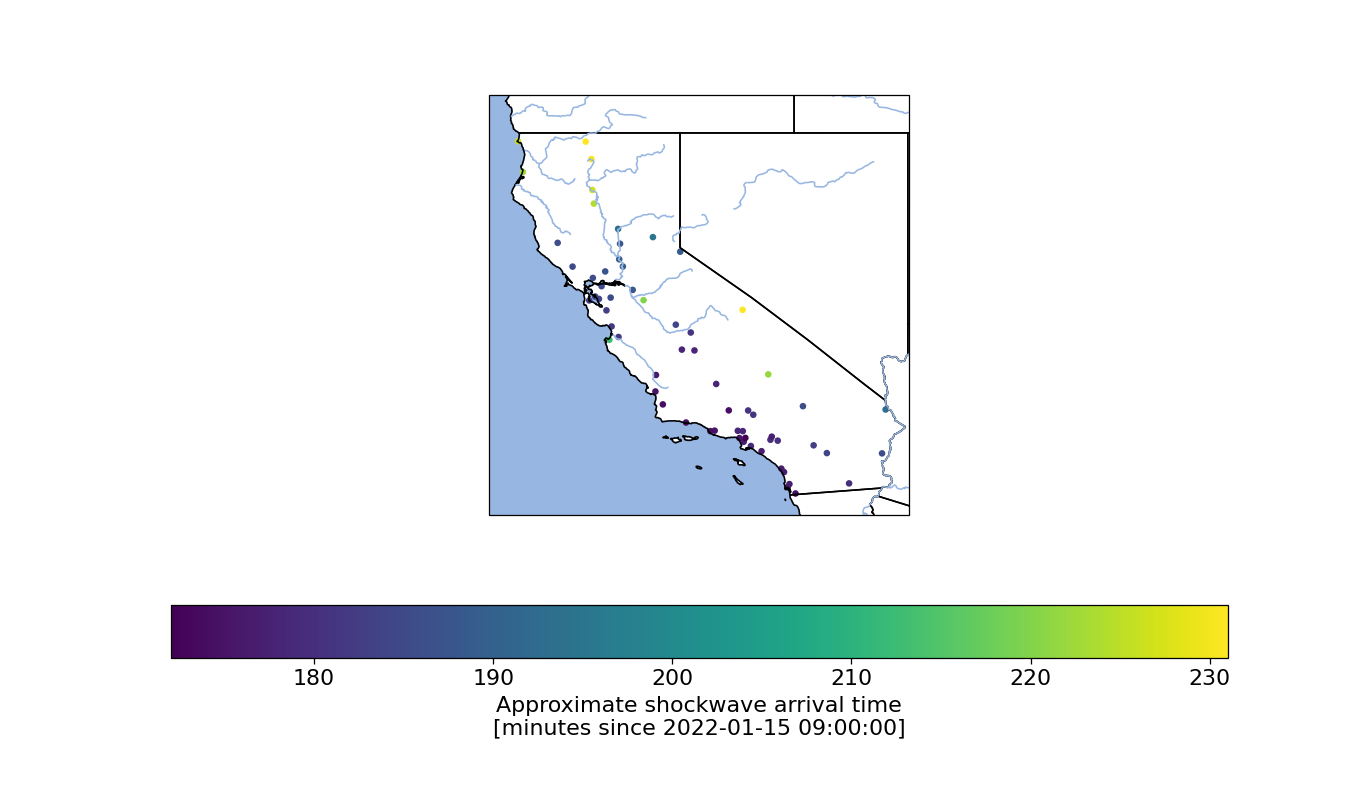

In [18]:
plt.figure(figsize=(12,7))
ax = plt.axes(projection=cartopy.crs.PlateCarree())
#ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.OCEAN)  # added the ocean for fun
ax.add_feature(cartopy.feature.RIVERS) # added rivers for fun
ax.set_extent([-125, -114, 32, 43])

num_largest_changes = 1

color_map = plt.get_cmap('viridis')

lats = []
lons = []
times_of_change = []

for station in stations:
    lats.append(d[station][0])
    lons.append(d[station][1])
    
    percent_change = pct_change_df[station].nlargest(n=num_largest_changes)
    time_of_change = percent_change.index[0]
    times_of_change.append(time_of_change)

plot = ax.scatter(lons, lats, s=10, c=times_of_change, cmap=color_map)

cbar = plt.colorbar(plot, location='bottom')
cbar.ax.tick_params(labelsize=14)
cbar.set_label(f'Approximate shockwave arrival time' + '\n' 
               + f'[minutes since {df["valid(UTC)"][0]}]', fontsize=14)

ax.set_xlabel(r'Longitude [$^{\circ}$]', fontsize=14)
ax.set_ylabel(r'Latitude [$^{\circ}$]', fontsize=14)
ax.tick_params(axis="both",labelsize=14)

It makes sense that the locations furthest from Tonga detect the shockwave at later times than do the locations closer to Tonga in Southern California. I expected the locations around the Bay to be less purple than they are, which probably indicates that my method of detecting the shockwave arrival time could be adjusted. However, the general sanity check passes: greater distance, greater time to arrival.

d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

In [19]:
OAK_time = times_of_change[np.where(stations=="OAK")[0][0]]
OAK_time

184

In [20]:
t0 = datetime(2022, 1, 15, 4, 15, 45)
tmax = datetime.strptime(df["valid(UTC)"][OAK_time], "%Y-%m-%d %H:%M:%S")
print(t0)
print(tmax)

2022-01-15 04:15:45
2022-01-15 12:04:00


In [21]:
delta_t = tmax - t0

# convert to float in seconds
delta_t = delta_t.total_seconds()
delta_t

28095.0

In [22]:
x0 = (-20.550, -175.385) # 20.550° S, 175.385° W
x = d["OAK"]

In [23]:
from scipy.constants import speed_of_sound
from astropy.constants import R_earth # in meters
from haversine import haversine, Unit # https://pypi.org/project/haversine/

In [24]:
distance = haversine(x, x0, unit='m')
distance

8533703.796246832

In [25]:
speed = distance / delta_t
print(f"The speed of the shockwave is {speed:.1f} m/s.")

The speed of the shockwave is 303.7 m/s.


In [26]:
print(f"The speed of the sound in air is {speed_of_sound:.1f} m/s.")

The speed of the sound in air is 340.5 m/s.


In [27]:
perc_diff = np.abs(speed - speed_of_sound)/speed_of_sound
print(f"The percent difference between the two is {100*perc_diff:.1f}%.")

The percent difference between the two is 10.8%.


### Answer: 

<p>Pretty close to speed of sound in air! The shockwave must propagate faster than the speed of sound in air, at least initially, but the speed of sound changes depending on the conditions of the air. It can change with respect to temperature and density, and by extentsion, potentially the elevation of the station. Perhaps by the time the shockwave reached Oakland, the shockwave had traveled through changing air conditions and dropped in amplitude such that its overall speed was below the speed of sound at standard temperature and pressure.</p>   

<p>Potential source of error: We incur some error because we're finding percent changes over a given time interval on the order of minutes. I chose a 15 minute interval, but averaging over different time intervals may pinpoint the shockwave arrival to a slightly different time. A time difference of only a couple of minutes could certainly change the calculated sound speed.</p> 

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.

In [28]:
def pressure(time):
    return df.iloc[time, 1:].values

In [29]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


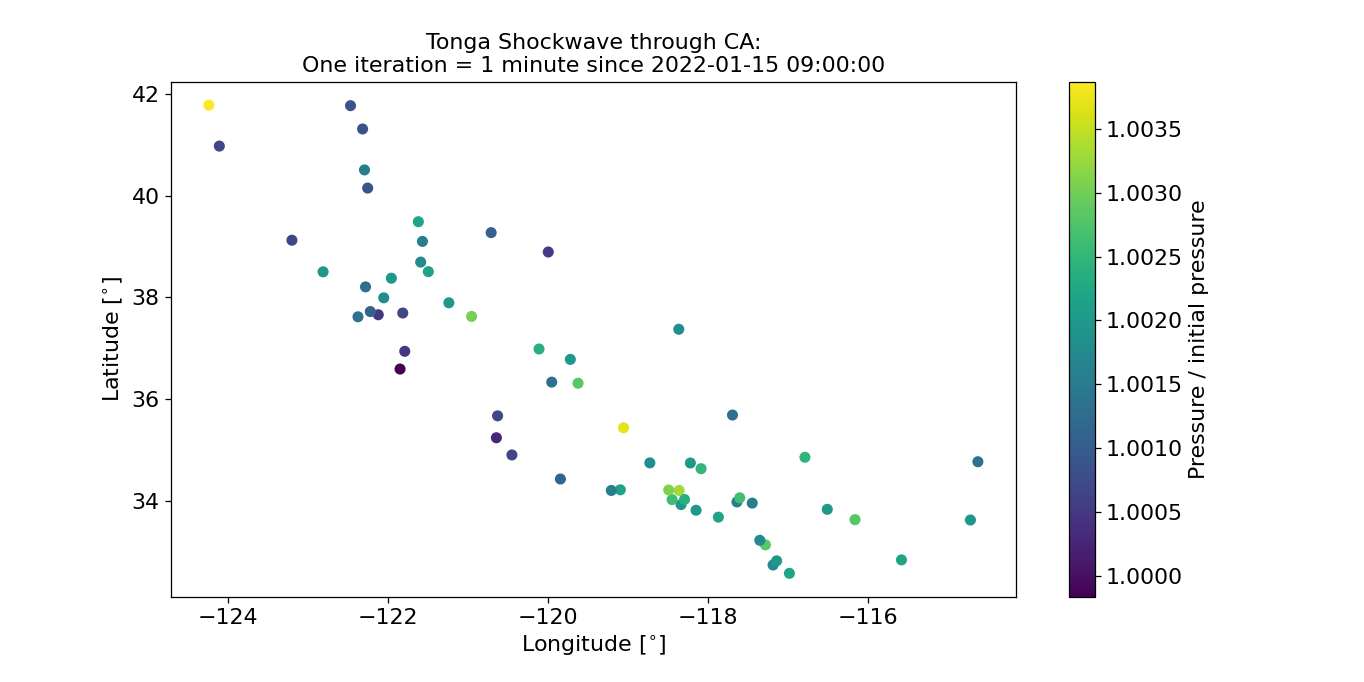

In [30]:
fig, ax = plt.subplots(figsize=(12,6))

ims = []
for time in df.index:
    
    im = ax.scatter(lons, lats, c=pressure(time)/pressure(0), animated=True)
    #ann = plt.annotate(f'{time}', (40, -116.01), fontsize=14)
    
    # show an initial image first
    if i == 0:
        ax.scatter(lons, lats, c=pressure(time)/pressure(0)) 
        #ann = plt.annotate(f'{time}', (40.5, -116.02))
   
    ims.append([im])
    #ann.remove()
    
ani = animation.ArtistAnimation(fig, ims, interval=500, repeat=False)

cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Pressure / initial pressure', fontsize=14)

# really wanted this annotation to work...oh well
#plt.annotate('Minutes since ' + df["valid(UTC)"][0].split(' ')[0] 
#             + '\n' + df["valid(UTC)"][0].split(' ')[1] + ':', (37, -116), fontsize=14)

ax.set_title('Tonga Shockwave through CA:' + '\n' + 
             f'One iteration = 1 minute since {df["valid(UTC)"][0]}', fontsize=14)
ax.set_xlabel(r'Longitude [$^{\circ}$]', fontsize=14)
ax.set_ylabel(r'Latitude [$^{\circ}$]', fontsize=14)
ax.tick_params(axis="both",labelsize=14)


In [33]:
# f = r"tonga_animation_CA.gif" 
# writergif = animation.PillowWriter(fps=1) 
# ani.save(f, writer=writergif)

Overall I'm pleased with this! I've never made an animation before in Python. I really wanted to include an annotation in the plot which displayed the iteration number, i.e. the number of minutes elapsed, of each frame, but I couldn't get that feature working. I suspect it is because I generate all the figures beforehand, store them, and then flip through them as an array in animation.ArtistAnimation. The annotation on each figure is then overlayed on the previous, rendering it indecipherable. Using animation.FuncAnimation probably would have enabled me to get this annotation working, but I had a lot of trouble trying to get it working and I ultimately decided to present my result with animation.ArtistAnimation.